In [1]:
# import all the required libraries
import pandas as pd
import numpy as np
import re
from collections import Counter
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from nltk.corpus import stopwords
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from time import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import KFold 
import matplotlib.pyplot as plt

In [2]:
#load data
df = pd.read_csv("Emotion_Unbalanced_15000.csv")

In [3]:
# total unique features in the dataset
uniquewords = pd.Series(' '.join(df['content']).split()).value_counts()
uniquewords.count()

15012

In [4]:
# Classifiying the labels are by calling the function and put it in new column Emot
df['Emot'] = df['Emotion']

In [5]:
# Counts the total features for each classifier
Counter(df["Emot"])

Counter({'sadness': 4361,
         'joy': 5077,
         'love': 1244,
         'anger': 2063,
         'fear': 1717,
         'surprise': 1007})

In [6]:
# connvert the features into lowercase
df['content'] = df['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                im alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [7]:
# remove the Url from the content as they are meaningless for emotion detection
df['content'] = df['content'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                im alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [8]:
# remove the words starting with @ as they are not determining any emotion
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x[0]!="@"))
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                im alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [9]:
# remove the words starting with # as they are not determining any emotion
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x[0]!="#"))
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                im alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [10]:
# Do the spell check
df['content'] = df['content'].apply(lambda x: str(TextBlob(x).correct()))
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                in alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [11]:
# remove all the digits
df['content'] = df['content'].str.replace('\d+', '')
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                in alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [12]:
# remove the non utf-8 characters with space
df['content'] = df['content'].map(lambda x: re.sub(r'\W+', ' ', x))
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                in alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [13]:
# Remove the stopwords
stop = stopwords.words('english')
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['content'].head()

0           feel awful job get position succeed happen
1                                     alone feel awful
2                         feeling little low days back
3    also feel disillusioned someone claimed value ...
4    wish knew every word write write think useless...
Name: content, dtype: object

In [14]:
# Do the lametization on the features
df['content'] = df['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['content'].head()

0           feel awful job get position succeed happen
1                                     alone feel awful
2                          feeling little low day back
3    also feel disillusioned someone claimed value ...
4    wish knew every word write write think useless...
Name: content, dtype: object

In [15]:
# take the content and emotion in x and y variables respectively
x = df.content
y = df.Emot

In [16]:
# set the seed to avoid getting different results everytime
SEED = 100
# train_test_split will divide the data into 70% training set and 30% test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=SEED)

In [17]:
# print total training set count and percent of each class (6 classes)
print("Train set has total {0} entries with {1:.2f}% sadness, {2:.2f}% joy, {3:.2f}% love, {4:.2f}% anger, {5:.2f}% fear, {6:.2f}% surprise".format(len(x_train),
                                                                              (len(x_train[y_train == "sadness"]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == "joy"]) / (len(x_train)*1.))*100,
                                                                             (len(x_train[y_train == "love"]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == "anger"]) / (len(x_train)*1.))*100,
                                                                             (len(x_train[y_train == "fear"]) / (len(x_train)*1.))*100,                                                                        
                                                                            (len(x_train[y_train == "surprise"]) / (len(x_train)*1.))*100))
# print total test set count and percent of each class (6 classes)
print("Test set has total {0} entries with {1:.2f}% sadness, {2:.2f}% joy, {3:.2f}% love, {4:.2f}% anger, {5:.2f}% fear , {6:.2f}% surprise".format(len(x_test),
                                                                             (len(x_test[y_test == "sadness"]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == "joy"]) / (len(x_test)*1.))*100,
                                                                             (len(x_test[y_test == "love"]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == "anger"]) / (len(x_test)*1.))*100,
                                                                             (len(x_test[y_test == "fear"]) / (len(x_test)*1.))*100,                                                                        
                                                                            (len(x_test[y_test == "surprise"]) / (len(x_test)*1.))*100))


Train set has total 10828 entries with 28.02% sadness, 33.21% joy, 8.19% love, 13.07% anger, 11.09% fear, 6.42% surprise
Test set has total 4641 entries with 28.59% sadness, 31.91% joy, 7.69% love, 13.96% anger, 11.12% fear , 6.72% surprise


In [18]:
# this function will be called from nfeature_accuracy_checker, this will fit the pipeline on training set and
#  give the accuracy score for the text set for all the features from 1000 till 10001 and for each ngram
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    sentiment_fit = pipeline.fit(x_train, y_train)      # fit pileline on training set
    y_pred = sentiment_fit.predict(x_test)              # predict the test content that which emotion each content is having
    accuracy = accuracy_score(y_test, y_pred)           # check the accuracy score for the prediction on test set
#     print("accuracy score: {0:.2f}%".format(accuracy*100)) 
#     print("-"*80) 
    return accuracy  # return the accuracy score to the nfeature_accuracy_checker

In [19]:
# this function will be called from get_best_ngrams, this will check the accuracy for every 500 features 
# from 1000 upto 10001 and it will return the result as accuracy
def nfeature_accuracy_checker(vectorizer, n_features, stop_words, ngram_range, classifier):
    result = []
#     print (classifier)
#     print("\n")
# loop through all the features from 1000 to 10001 for each ngram (unigram, bigram, trigram)
    for n in n_features:
        # set the parameters of vectorizer (stopwords, features and ngram into consideration)
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([                    # create a pipeline, pass vectorizor and classifier to it
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
#         print("Validation result for {} features".format(n)) 
        # call the accuracy_summary function to fit on train set and predict the accuracy on test set
        nfeature_accuracy = accuracy_summary(checker_pipeline, x_train, y_train, x_test, y_test)
        result.append((n,nfeature_accuracy)) # append the accuracy for each features
    return result  # result is returned to the get_best_ngram function for each ngram(unigram, bigram, trigram)

In [20]:
# this function will be call from get_best_ngrams, this will create a plot for all the features against each considered ngrams
def plot_feature_comparision(ug, bg, tg):
    nfeatures_plot_tg = pd.DataFrame(tg,columns=['nfeatures','validation_accuracy'])
    nfeatures_plot_bg = pd.DataFrame(bg,columns=['nfeatures','validation_accuracy'])
    nfeatures_plot_ug = pd.DataFrame(ug,columns=['nfeatures','validation_accuracy'])

    plt.figure(figsize=(8,6))
    plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram')
    plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram')
    plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram')
    plt.title("N-gram(1~3) test result : Accuracy")
    plt.xlabel("Number of features")
    plt.ylabel("Validation set accuracy")
    plt.legend()
    return;

In [21]:
# this function checks the best n-gram for the classifier
def get_best_ngrams(cvec, n_features, stp, cls):
    ngs = [                                             
    (1,1),
    (1,2),
    (1,3)]                                  # this ngs is an array of unigram, bigram and trigram
    feature_result_ug = ''                  # this variable will hold the result for unigram
    feature_result_bg = ''                  # this variable will hold the result for biagram
    feature_result_tg = ''                  # this variable will hold the result for trigram
    for ng in ngs:                          # loop through each n-gram (unigram, bigram, trigram) and call the function to return accuracy for each
        if ng == (1,1):                 
#             print("RESULT FOR UNIGRAM\n") 
            feature_result_ug = nfeature_accuracy_checker(cvec, n_features, stp, ng, cls) 
        elif ng == (1,2):                                                       
#             print("RESULT FOR BIGRAM\n")
            feature_result_bg = nfeature_accuracy_checker(cvec, n_features, stp, ng, cls) 
        elif ng == (1,3):                                                                
#             print("RESULT FOR TRIGRAM\n") 
            feature_result_tg = nfeature_accuracy_checker(cvec, n_features, stp, ng, cls)
    print (cls)
    plot_feature_comparision(feature_result_ug, feature_result_bg, feature_result_tg)  # this function plots the feature comparison for each n gram
    return;

In [22]:
def train_test_and_evaluate(pipeline, x_train, y_train, x_test, y_test):
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']))
    confusion = pd.DataFrame(conmat, index=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
                         columns=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
    print("accuracy score: {0:.2f}%".format(accuracy*100)) 
    print("-"*80)
    print("Confusion Matrix\n")
    print(confusion) 
    print("-"*80) 
    print("Classification Report\n") 
    print(classification_report(y_test, y_pred, target_names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']))
    return sentiment_fit;

In [23]:
def classifivation_report(mf, ng, spl):
    ug_cvec = CountVectorizer(max_features=mf, ngram_range=ng)
    ug_pipeline = Pipeline([
            ('vectorizer', ug_cvec),
            ('classifier', cls)
        ])
    sentiment_fit = train_test_and_evaluate(ug_pipeline, x_train, y_train, x_test, y_test)
    cv_kfold(spl, ug_pipeline)
    return sentiment_fit, ug_pipeline;

In [35]:
# this function performs K-fold cross valdation for K=10
def cv_kfold(spl, pipeline):
    kf = KFold(n_splits=spl, shuffle=True)
    kf.get_n_splits(x)
    print(kf) 
    accuracy_kfold = 0
    accuracy_kfold_avg = 0
    for train_index, test_index in kf.split(x):
        x_train_cv, x_test_cv = x[train_index], x[test_index]
        y_train_cv, y_test_cv = y[train_index], y[test_index]
        fit = pipeline.fit(x_train_cv, y_train_cv)
        y_pred_cv = fit.predict(x_test_cv)
        accuracy_kfold = accuracy_score(y_test_cv, y_pred_cv)
        accuracy_kfold_avg = accuracy_kfold_avg + accuracy_kfold
        print(accuracy_kfold)

    print("Avg Accuracy",accuracy_kfold_avg/kf.get_n_splits())

In [25]:
freq = pd.Series(' '.join(df['content']).split()).value_counts()
freq.count()

10575

In [26]:
cvec = CountVectorizer()
n_features = np.arange(1000,10001,500)
stp = None

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)


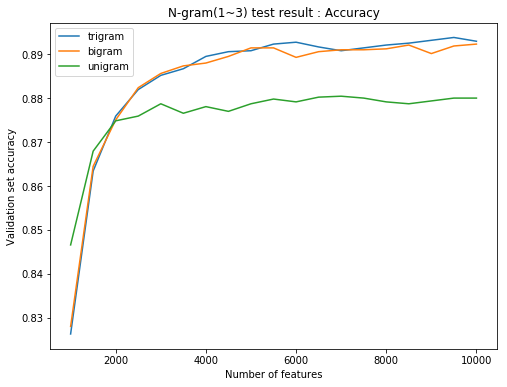

In [36]:
cls = LogisticRegression(solver='newton-cg', multi_class='multinomial')
get_best_ngrams(cvec, n_features, stp, cls)

In [37]:
mf_ = 6000
ng_ = (1,3)
spl_= 10
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 89.27%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness   joy  love  anger  fear  surprise
sadness      1248    32     6     28    11         2
joy            20  1388    52      4     6        11
love            4    71   279      1     1         1
anger          46    27     2    538    32         3
fear           25    23     3      5   424        36
surprise        3    20     0      1    22       266
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.93      0.83      0.88       648
         joy       0.85      0.82      0.84       516
        love       0.89      0.94      0.91      1481
       anger       0.82      0.78      0.80       357
        fear       0.93      0.94      0.93      1327
    surprise       0.83      0.85      0.84       312

   micro avg       0.89

In [ ]:
y_pred = sentiment_fit.predict(['Damm servers still down  i need to hit 80 before all the koxpers pass me'])
y_pred

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


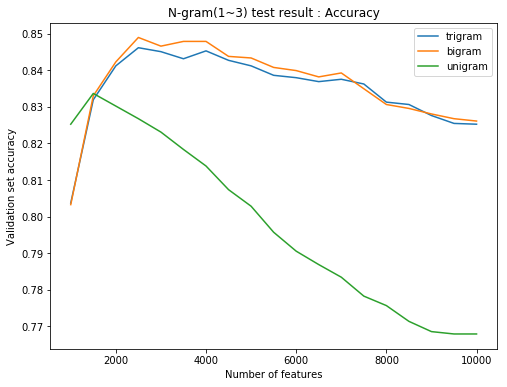

In [30]:
cls = MultinomialNB()
get_best_ngrams(cvec, n_features, stp, cls)

In [31]:
mf_ = 2500
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 84.90%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness   joy  love  anger  fear  surprise
sadness      1187    63    16     34    26         1
joy            36  1335    71     12    18         9
love            8    69   269      4     2         5
anger          50    45     6    510    30         7
fear           27    20     6     20   405        38
surprise        7    42     2      1    26       234
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.88      0.79      0.83       648
         joy       0.80      0.78      0.79       516
        love       0.85      0.90      0.87      1481
       anger       0.73      0.75      0.74       357
        fear       0.90      0.89      0.90      1327
    surprise       0.80      0.75      0.77       312

   micro avg       0.85

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


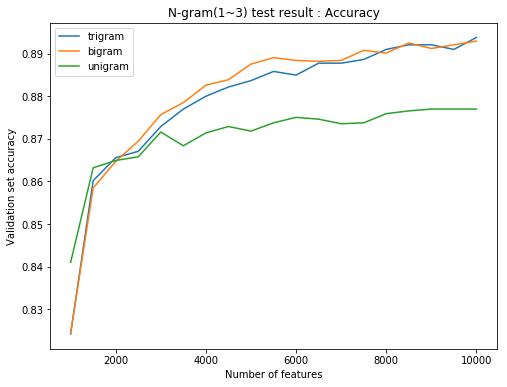

In [32]:
cls = LinearSVC()
get_best_ngrams(cvec, n_features, stp, cls)

In [33]:
mf_ = 8000
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 89.01%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness   joy  love  anger  fear  surprise
sadness      1229    38     8     30    15         7
joy            23  1369    55     10     9        15
love            7    59   287      3     1         0
anger          39    24     2    549    30         4
fear           22    14     4      7   435        34
surprise        2    18     1      1    28       262
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.92      0.85      0.88       648
         joy       0.84      0.84      0.84       516
        love       0.90      0.92      0.91      1481
       anger       0.80      0.80      0.80       357
        fear       0.93      0.93      0.93      1327
    surprise       0.81      0.84      0.83       312

   micro avg       0.89

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)


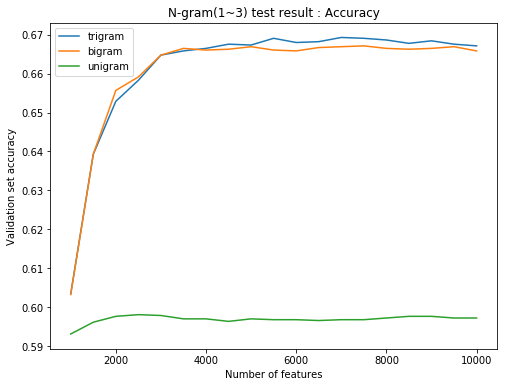

In [34]:
cls = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
get_best_ngrams(cvec, n_features, stp, cls)

In [ ]:
mf_ = 5000
ng_ = (1,3)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

In [ ]:
cls = SGDClassifier()
get_best_ngrams(cvec, n_features, stp, cls)

In [ ]:
mf_ = 5500
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

In [ ]:
cls = KNeighborsClassifier()
get_best_ngrams(cvec, n_features, stp, cls)

In [ ]:
mf_ = 8500
ng_ = (1,3)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ug_pipeline, x, y, cv=10)
scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

C:\Users\Kopal-PC\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


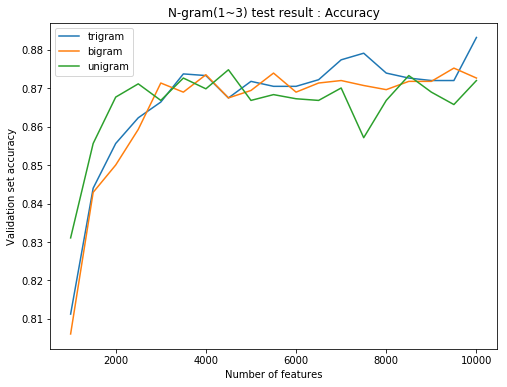

In [38]:
cls = RandomForestClassifier()
get_best_ngrams(cvec, n_features, stp, cls)

In [39]:
mf_ = 7500
ng_ = (1,3)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 87.11%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness   joy  love  anger  fear  surprise
sadness      1182    54     9     45    28         9
joy            45  1313    59     25    20        19
love            3    62   284      3     3         2
anger          34    26     1    551    31         5
fear           21    13     0      9   432        41
surprise        2     6     0      4    19       281
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.86      0.85      0.86       648
         joy       0.81      0.84      0.82       516
        love       0.89      0.89      0.89      1481
       anger       0.80      0.80      0.80       357
        fear       0.92      0.89      0.90      1327
    surprise       0.79      0.90      0.84       312

   micro avg       0.87

In [ ]:
def predictUnseen():
    
    y_pred = sentiment_fit.predict(['Damm servers still down  i need to hit 80 before all the koxpers pass me'])
    y_pred